# Findings
- Overall better performance when training on split_1 (lower loss and higher accuracy) (perhaps not relevant)

# Functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [69]:
def l2d_old(line):
    return " ".join(line.split()).split(" ")

def l2d(line):
    name = (line.split("  ")) # split on double whitespace
    name = next(sub for sub in name if sub) # fetch first non-empty cell
    name = name.strip() # remove whitespace from string
    
    metrics = (" ".join(line.split()).split(" ")[-4:])
    return ([name]+metrics)

def parse_classification_report(path):
    class_m = {}
    tot_m = {}
    
    if "teacher" in path:
        model = "teacher"
    else:
        model = "student"
    
    with open(path) as file:
        line = file.readline()
        line = file.readline() # skip first line
        line = file.readline()
        while line:
            data = l2d(line)
            
            class_m[data[0]] = {
                "prec": float(data[1]),
                "rec": float(data[2]),
                "f1": float(data[3]),
                "model": model
            }
            line = file.readline()

            if len(line) == 1:
                line = False
                
        line = file.readline()
        tot_m["acc"] = l2d_old(line)[1]
        line = file.readline()
        tot_m["macro"] = l2d_old(line)[2:5]
        line = file.readline()
        tot_m["weighted"] = l2d_old(line)[2:5]
                
    return class_m, tot_m

# _, tot_m = parse_classification_report(report_file)

In [3]:
import ast

def parse_history(path):
    with open(path) as file:
        # loss - acc - val_los - val_acc
        loss = file.readline()
        acc = file.readline()
        val_loss = file.readline()
        val_acc = file.readline()
        
        history = {
            "loss": ast.literal_eval(loss.split(":")[-1].strip()),
            "acc": ast.literal_eval(acc.split(":")[-1].strip()),
            "val_loss": ast.literal_eval(val_loss.split(":")[-1].strip()),
            "val_acc": ast.literal_eval(val_acc.split(":")[-1].strip())
        }
        
        return history

In [4]:
def savefig(name):
    plt.savefig("figures/nss_"+name+".pdf", format="pdf")

In [5]:
def average_history(history_list):
    
    result = [0]*int(len(history_list[0]))
    for history in (history_list):
        for idx, val in enumerate(history):
            result[idx] += val
            
    result = [res/(len(history_list)) for res in result]
    return (result)

# Get results from training on split_0

In [61]:
exp_dir = "/home/henriklg/master-thesis/code/kvasir-capsule/experiments/cl_500/ns_split0"
sub_dirs = ["0_teacher", "0_student", "1_teacher", "1_student", "2_teacher", "2_student"]

### Accuracy and loss

In [7]:
loss_list = []
acc_list = []

val_loss_list = []
val_acc_list = []

for dir_ in sub_dirs:
    path = "{}/{}/history.txt".format(exp_dir, dir_)
    
    history = parse_history(path)
    
    loss_list.append(history["loss"])
    acc_list.append(history["acc"])
    val_loss_list.append(history["val_loss"])
    val_acc_list.append(history["val_acc"])
    
x = list(range(len(val_acc_list[1])))

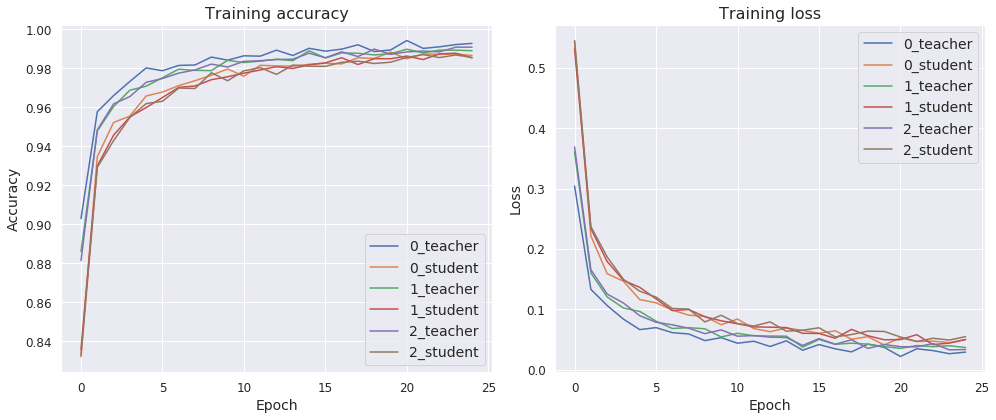

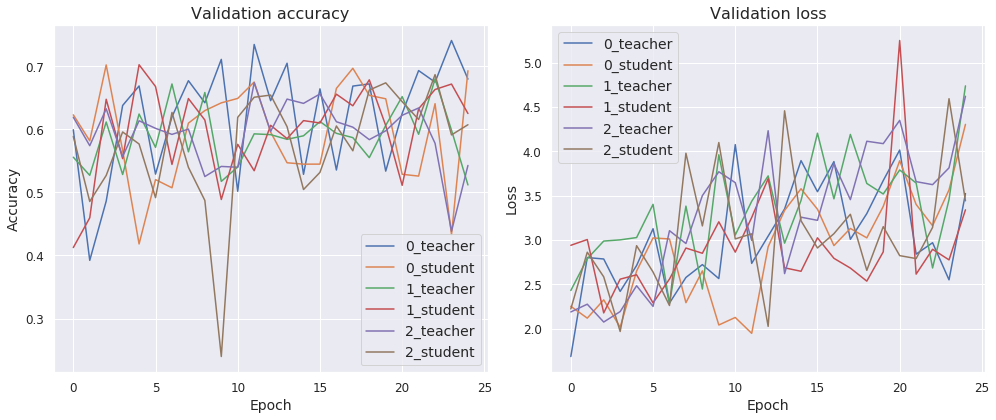

In [8]:
plt.figure(figsize=(14,6));
# Subplot 1
plt.subplot(1, 2, 1)
for model in acc_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Accuracy");
plt.title('Training accuracy')
plt.tight_layout()

# Subplot 2
plt.subplot(1, 2, 2)
for model in loss_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.tight_layout()
plt.title('Training loss')
savefig("history_training")


plt.figure(figsize=(14,6));
# Subplot 1
plt.subplot(1, 2, 1)
for model in val_acc_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Accuracy");
plt.title('Validation accuracy')
plt.tight_layout()

# Subplot 2
plt.subplot(1, 2, 2)
for model in val_loss_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.tight_layout()
plt.title('Validation loss')
savefig("history_validation_split0")

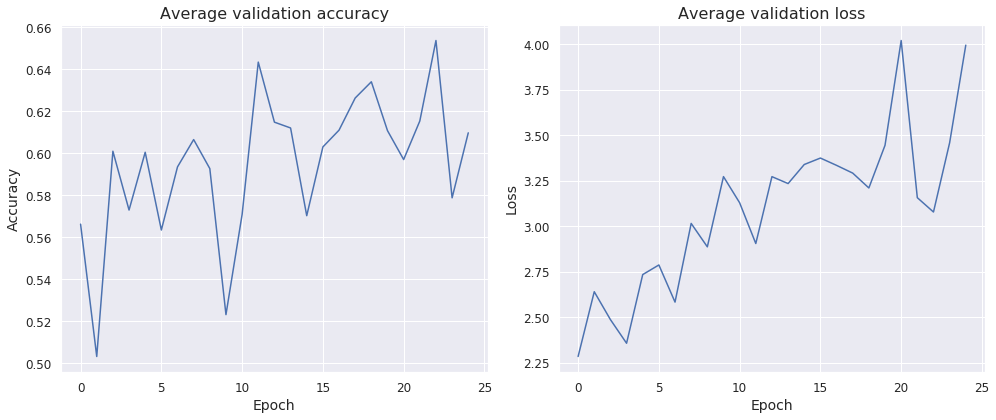

In [9]:
avg_val_acc_0 = average_history(val_acc_list)
avg_val_loss_0 = average_history(val_loss_list)

plt.figure(figsize=(14,6));
# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(x, avg_val_acc_0)
plt.xlabel("Epoch")
plt.ylabel("Accuracy");
plt.title('Average validation accuracy')
plt.tight_layout()

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(x, avg_val_loss_0)
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.tight_layout()
plt.title('Average validation loss')
savefig("history_average_validation_split0")

### F1-measure

In [70]:
report_contents = []

for model in sub_dirs:
    report_file = "{}/{}/classification_report.txt".format(exp_dir, model)
    
    _, tot_m = parse_classification_report(report_file)
    report_contents.append(tot_m);

In [71]:
report_contents

[{'acc': '0.679',
  'macro': ['0.267', '0.314', '0.217'],
  'weighted': ['0.790', '0.679', '0.714']},
 {'acc': '0.693',
  'macro': ['0.142', '0.196', '0.137'],
  'weighted': ['0.720', '0.693', '0.698']},
 {'acc': '0.512',
  'macro': ['0.154', '0.246', '0.161'],
  'weighted': ['0.720', '0.512', '0.588']},
 {'acc': '0.625',
  'macro': ['0.163', '0.215', '0.158'],
  'weighted': ['0.727', '0.625', '0.661']},
 {'acc': '0.543',
  'macro': ['0.217', '0.208', '0.155'],
  'weighted': ['0.755', '0.543', '0.622']},
 {'acc': '0.607',
  'macro': ['0.165', '0.213', '0.166'],
  'weighted': ['0.755', '0.607', '0.667']}]

In [72]:
# Compare weighted and macro precision, recall and f1-score
prec = []
rec = []
f1 = []
acc = []

metric = "weighted"

for idx in range(len(report_contents)):
    content = report_contents[idx]
    
    acc.append(float(content["acc"]))
    prec.append(float(content[metric][0]))
    rec.append(float(content[metric][1]))
    f1.append(float(content[metric][2]))

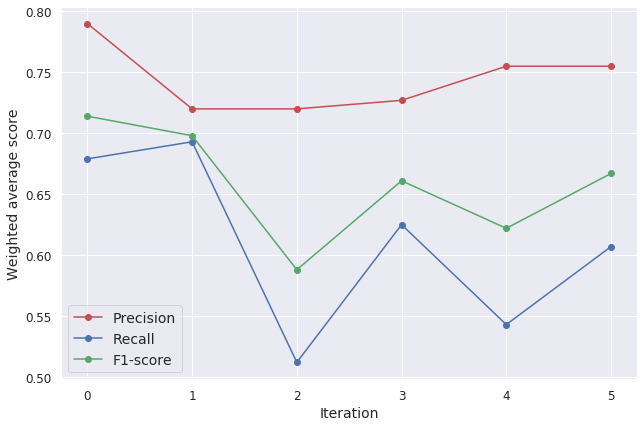

In [75]:
x = list(range(len(sub_dirs)))

fig, ax = plt.subplots(figsize=(9,6))
fig = plt.plot(x,prec,'r', x,rec,'b', x,f1,'g', marker='o');
fig = plt.legend(["Precision","Recall","F1-score", "acc"])
plt.tight_layout(pad=1.5)
fig = plt.xlabel("Iteration")
fig = plt.ylabel("Weighted average score")
savefig("prec_rec_f1.pdf")

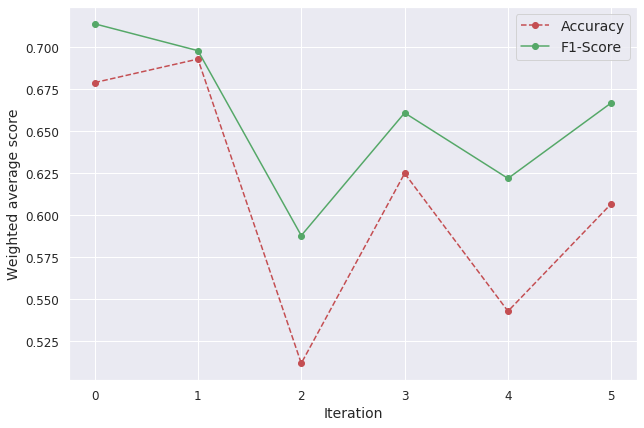

In [74]:
fig, ax = plt.subplots(figsize=(9,6))
fig = plt.plot(x,acc,'r--', x,f1,'g-', linewidth=1.5, marker='o');
fig = plt.legend(["Accuracy", "F1-Score"])
plt.tight_layout(pad=1.5)
fig = plt.xlabel("Iteration")
fig = plt.ylabel("Weighted average score")

# Get results from training on split_1

In [10]:
exp_dir = "/home/henriklg/master-thesis/code/kvasir-capsule/experiments/cl_500/ns_split1"
sub_dirs = ["0_teacher", "0_student", "1_teacher", "1_student", "2_teacher", "2_student"]

### Accuracy and loss

In [11]:
loss_list = []
acc_list = []

val_loss_list = []
val_acc_list = []

for dir_ in sub_dirs:
    path = "{}/{}/history.txt".format(exp_dir, dir_)
    
    history = parse_history(path)
    
    loss_list.append(history["loss"])
    acc_list.append(history["acc"])
    val_loss_list.append(history["val_loss"])
    val_acc_list.append(history["val_acc"])
    
x = list(range(len(val_acc_list[1])))

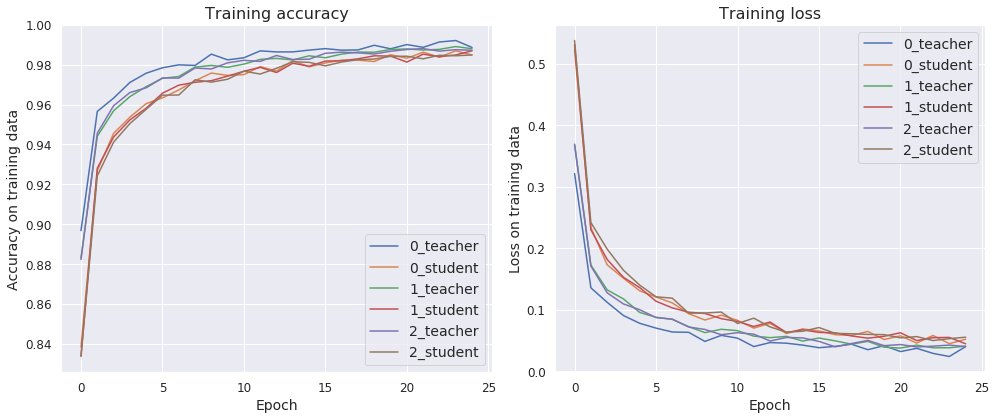

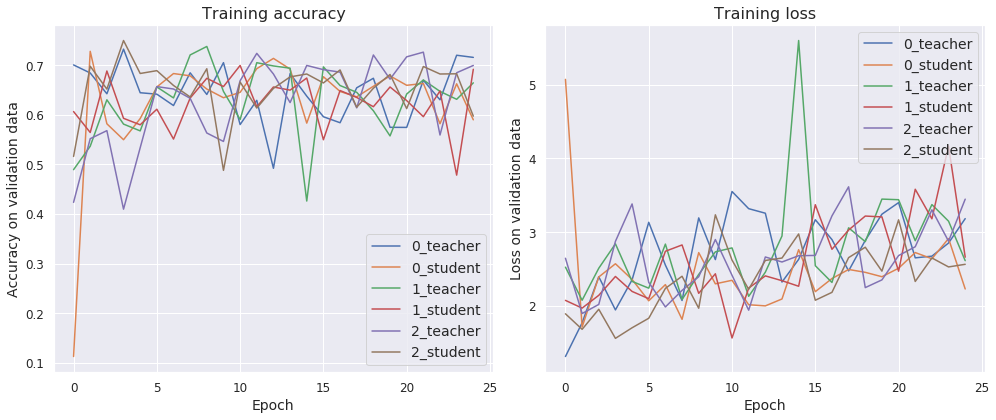

In [12]:
plt.figure(figsize=(14,6));
# Subplot 1
plt.subplot(1, 2, 1)
for model in acc_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Accuracy on training data");
plt.title('Training accuracy')
plt.tight_layout()

# Subplot 2
plt.subplot(1, 2, 2)
for model in loss_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Loss on training data");
plt.tight_layout()
plt.title('Training loss')
savefig("history_training")


plt.figure(figsize=(14,6));
# Subplot 1
plt.subplot(1, 2, 1)
for model in val_acc_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Accuracy on validation data");
plt.title('Training accuracy')
plt.tight_layout()

# Subplot 2
plt.subplot(1, 2, 2)
for model in val_loss_list:
    plt.plot(x, model)
plt.legend(sub_dirs);
plt.xlabel("Epoch")
plt.ylabel("Loss on validation data");
plt.tight_layout()
plt.title('Training loss')
savefig("history_validation_split1")

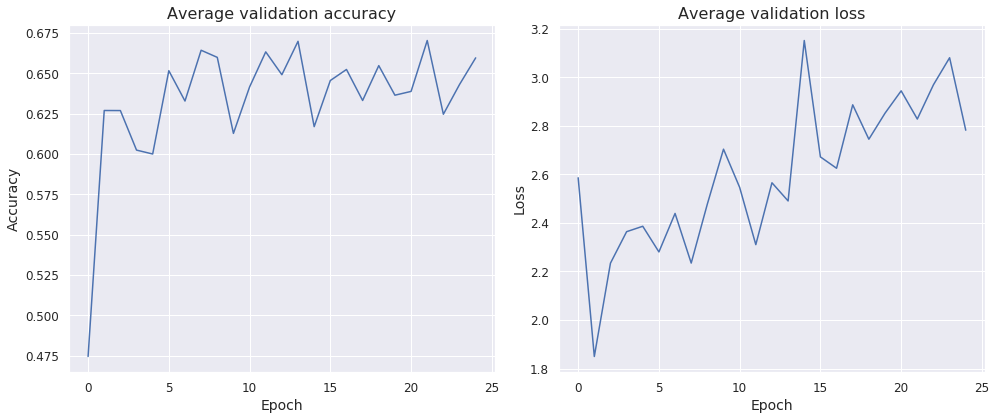

In [13]:
avg_val_acc_1 = average_history(val_acc_list)
avg_val_loss_1 = average_history(val_loss_list)

plt.figure(figsize=(14,6));
# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(x, avg_val_acc_1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy");
plt.title('Average validation accuracy')
plt.tight_layout()

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(x, avg_val_loss_1)
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.tight_layout()
plt.title('Average validation loss')
savefig("history_average_validation_split1")

### F1-measure

# Average the results of both splits

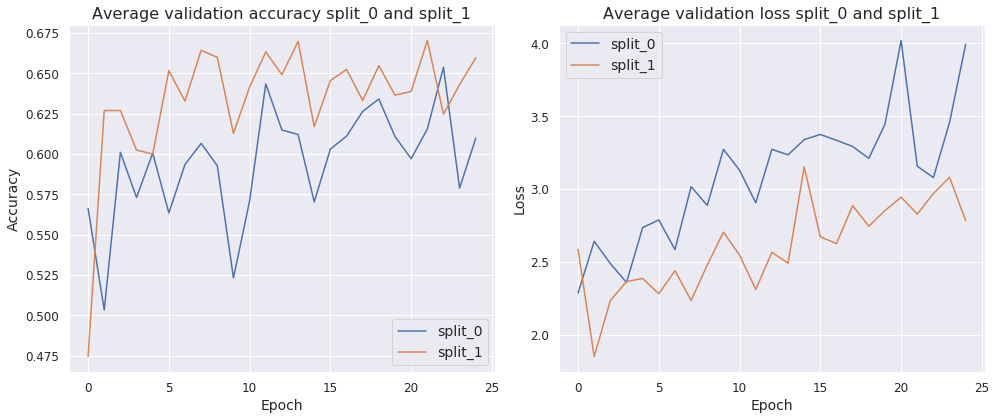

In [17]:
plt.figure(figsize=(14,6));
# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(x, avg_val_acc_0, x, avg_val_acc_1)
plt.legend(["split_0", "split_1"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy");
plt.title('Average validation accuracy split_0 and split_1')
plt.tight_layout()

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(x, avg_val_loss_0, x, avg_val_loss_1)
plt.legend(["split_0", "split_1"])
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.tight_layout()
plt.title('Average validation loss split_0 and split_1')
savefig("history_average_validation_both_splits")